In [1]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
arxiv_data = pd.read_json(r'data_accessing/arxiv_papers_int_aerospace.jsonl', orient='records', lines=True)
openalex_enriched_data = pd.read_json(r'data_accessing/arxivANDopenalex_papers_int_aerospace.jsonl', orient='records', lines=True)

In [3]:
len(arxiv_data)

1200

In [4]:
arxiv_data.columns

Index(['arxiv_id', 'doi', 'title', 'summary', 'published', 'updated',
       'authors', 'link', 'journal', 'category', 'pdf_link', 'full_text'],
      dtype='object')

In [5]:
arxiv_data.head()

,arxiv_id,doi,title,summary,published,updated,authors,link,journal,category,pdf_link,full_text
0,http://arxiv.org/abs/astro-ph/0005236v1,None,The All Sky Automated Survey. A Catalog of alm...,Results of the first two years of observations...,2000-05-11T18:00:15Z,2000-05-11T18:00:15Z,"[ Pojmanski, G]",http://arxiv.org/abs/astro-ph/0005236v1,"Acta Astron.50:177-190,2000",[astro-ph],http://arxiv.org/pdf/astro-ph/0005236v1,arXiv:astro-ph/0005236v1 11 May 2000\n1\nThe ...
1,http://arxiv.org/abs/cs/0006017v1,None,Turning Speech Into Scripts,We describe an architecture for implementing s...,2000-06-09T17:28:40Z,2000-06-09T17:28:40Z,"[Manny Rayner, Beth Ann Hockey, Frankie James]",http://arxiv.org/abs/cs/0006017v1,AAAI Spring Symposium on Natural Dialogues wit...,"[cs.CL, H.5.2; I.2.7]",http://arxiv.org/pdf/cs/0006017v1,Abstract\nWe describe an architecture for impl...
2,http://arxiv.org/abs/astro-ph/0207507v1,10.1086/341783,New High Proper Motion Stars from the Digitize...,We have conducted a systematic search for high...,2002-07-23T17:27:18Z,2002-07-23T17:27:18Z,"[Sebastien Lepine, Michael M. Shara, R. Michae...",http://arxiv.org/abs/astro-ph/0207507v1,"Astron.J.124:1190-1212,2002",[astro-ph],http://arxiv.org/pdf/astro-ph/0207507v1,arXiv:astro-ph/0207507v1 23 Jul 2002\nNew Hig...
3,http://arxiv.org/abs/astro-ph/0209477v1,10.1117/12.459507,A Distributed Control System for Rapid Astrono...,The Rapid Telescope for Optical Response (RAPT...,2002-09-23T18:26:56Z,2002-09-23T18:26:56Z,"[J. Wren, K. Borozdin, S. Brumby, D. Casperson...",http://arxiv.org/abs/astro-ph/0209477v1,None,[astro-ph],http://arxiv.org/pdf/astro-ph/0209477v1,arXiv:astro-ph/0209477v1 23 Sep 2002\nA Distr...
4,http://arxiv.org/abs/astro-ph/0302387v1,10.1051/0004-6361:20030195,Automated Determination of Stellar Parameters ...,We have assessed how well stellar parameters (...,2003-02-19T15:33:36Z,2003-02-19T15:33:36Z,"[P. G. Willemsen, C. A. L. Bailer-Jones, T. A....",http://arxiv.org/abs/astro-ph/0302387v1,"Astron.Astrophys.401:1203-1214,2003",[astro-ph],http://arxiv.org/pdf/astro-ph/0302387v1,arXiv:astro-ph/0302387v1 19 Feb 2003\nAstrono...


In [6]:
openalex_enriched_data.columns

Index(['arxiv_id', 'doi', 'title', 'summary', 'published', 'updated',
       'authors', 'link', 'journal', 'category', 'pdf_link', 'full_text',
       'openalex_id', 'concepts', 'cited_by_count', 'host_venue',
       'open_access', 'type', 'language', 'host_venue_license', 'is_paratext',
       'authorships', 'referenced_works', 'related_works', 'biblio',
       'institutions', 'grants', 'primary_location', 'mesh', 'keywords'],
      dtype='object')

In [7]:
openalex_enriched_data.concepts[0]

[{'id': 'https://openalex.org/C73329638',
  'wikidata': 'https://www.wikidata.org/wiki/Q527',
  'display_name': 'Sky',
  'level': 2,
  'score': 0.6969643999999999},
 {'id': 'https://openalex.org/C150846664',
  'wikidata': 'https://www.wikidata.org/wiki/Q7602306',
  'display_name': 'Stars',
  'level': 2,
  'score': 0.49068009999999995},
 {'id': 'https://openalex.org/C62649853',
  'wikidata': 'https://www.wikidata.org/wiki/Q199687',
  'display_name': 'Remote sensing',
  'level': 1,
  'score': 0.46843487},
 {'id': 'https://openalex.org/C41008148',
  'wikidata': 'https://www.wikidata.org/wiki/Q21198',
  'display_name': 'Computer science',
  'level': 0,
  'score': 0.4248978},
 {'id': 'https://openalex.org/C1276947',
  'wikidata': 'https://www.wikidata.org/wiki/Q333',
  'display_name': 'Astronomy',
  'level': 1,
  'score': 0.35819346},
 {'id': 'https://openalex.org/C121684516',
  'wikidata': 'https://www.wikidata.org/wiki/Q7600677',
  'display_name': 'Computer graphics (images)',
  'level': 

In [8]:
print(len(openalex_enriched_data))

1163


In [9]:
openalex_enriched_data['open_access'].sum()

np.int64(1079)

In [10]:
def plot_missing_values(df):
    """
    Plottet ein Balkendiagramm der Anzahl fehlender Werte (None/NaN) pro Spalte im DataFrame.

    Parameter:
    df (pd.DataFrame): Der DataFrame, der analysiert werden soll.
    """
    # Zählen der fehlenden Werte je Spalte
    missing_counts = df.isnull().sum()

    # Optional: Nur Spalten mit fehlenden Werten anzeigen
    # missing_counts = missing_counts[missing_counts > 0]

    if missing_counts.empty:
        print("Keine fehlenden Werte im DataFrame.")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Anzahl fehlender Werte pro Spalte')
    plt.xlabel('Spalten')
    plt.ylabel('Anzahl fehlender Werte')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

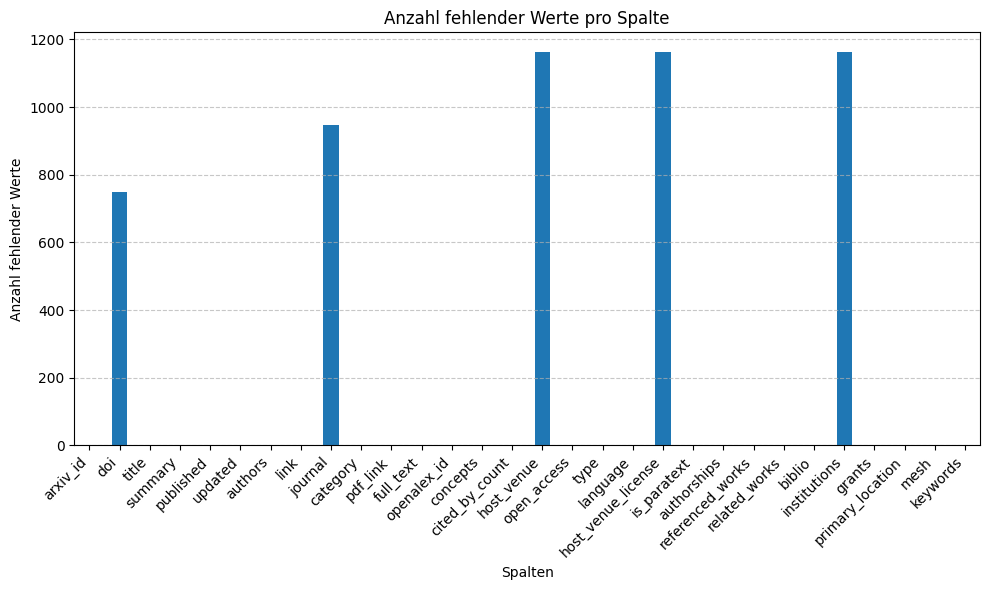

In [11]:
plot_missing_values(openalex_enriched_data)

In [12]:
def plot_publications_over_time(df, date_col='published'):
    """
    Plottet die Anzahl der Veröffentlichungen pro Jahr basierend auf der Datums-Spalte.

    Parameter:
    df (pd.DataFrame): DataFrame mit den Paper-Daten.
    date_col (str): Name der Spalte mit dem Veröffentlichungsdatum (default: 'published').
    """
    # Datumsspalte in datetime umwandeln (falls noch nicht passiert)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Nur gültige Datumswerte behalten
    valid_dates = df[df[date_col].notnull()]
    
    # Jahr extrahieren
    valid_dates['year'] = valid_dates[date_col].dt.year
    
    # Anzahl Veröffentlichungen pro Jahr zählen
    counts = valid_dates['year'].value_counts().sort_index()
    
    # Plot erstellen
    plt.figure(figsize=(10,6))
    counts.plot(kind='bar')
    plt.title('Publikationsverteilung pro Jahr')
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl Veröffentlichungen')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

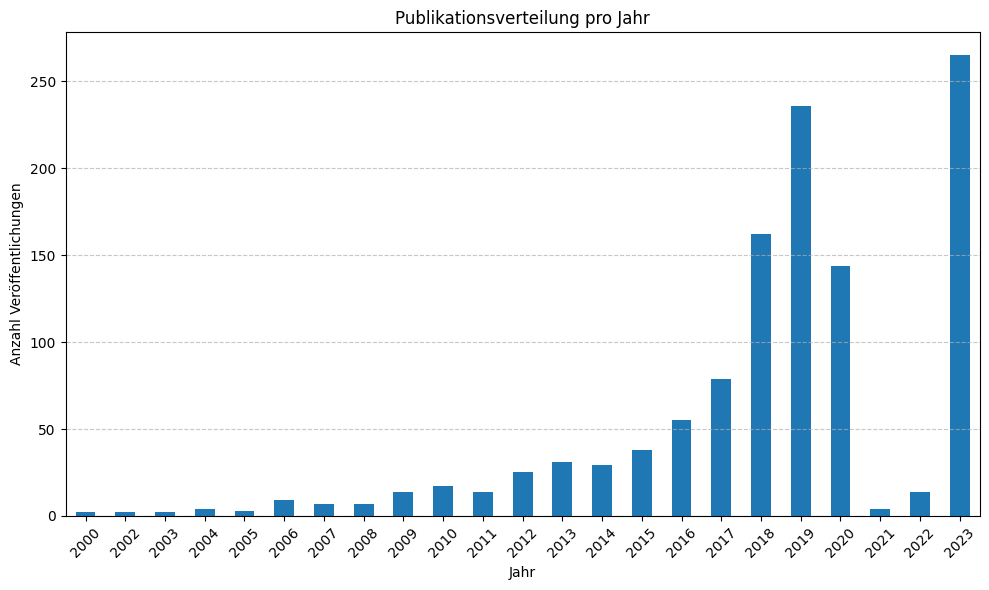

In [13]:
plot_publications_over_time(openalex_enriched_data)

In [14]:
def plot_top_concepts(df, concepts_col='concepts', top_n=10):
    """
    Plottet die häufigsten Concepts basierend auf dem Key 'display_name' in der Liste von Dicts.

    Parameter:
    df (pd.DataFrame): DataFrame mit den Paper-Daten.
    concepts_col (str): Name der Spalte mit der Liste von Dicts (default: 'concepts').
    top_n (int): Anzahl der Top Concepts, die angezeigt werden (default: 10).
    """
    all_concepts = []

    for entry in df[concepts_col].dropna():
        # Falls die Spalte als String gespeichert ist, versuche zu parsen
        if isinstance(entry, str):
            try:
                import ast
                concepts_list = ast.literal_eval(entry)
            except:
                concepts_list = []
        else:
            concepts_list = entry
        
        # concepts_list sollte eine Liste von Dicts sein
        for concept in concepts_list:
            name = concept.get('display_name')
            if name:
                all_concepts.append(name)
    
    # Häufigkeiten zählen
    concept_counts = Counter(all_concepts)
    common = concept_counts.most_common(top_n)
    
    if not common:
        print("Keine Concepts gefunden.")
        return
    
    # Trennen von Namen und Häufigkeiten
    names, counts = zip(*common)
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(names, counts)
    plt.title(f'Top {top_n} Themen')
    plt.xlabel('Themen')
    plt.ylabel('Anzahl der Vorkommen')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

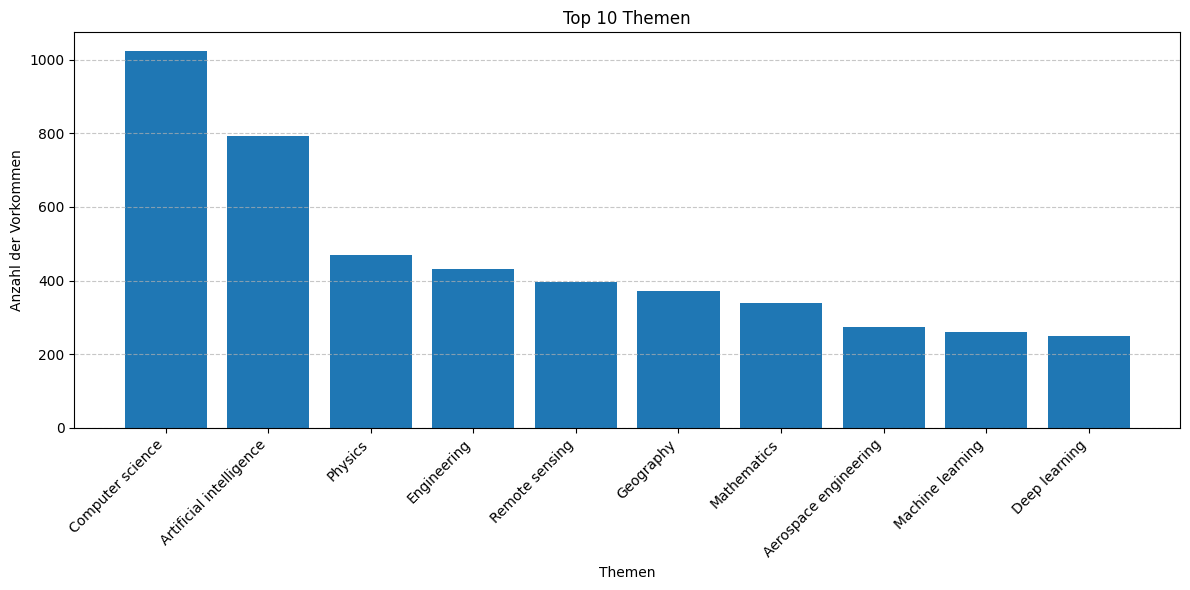

In [15]:
plot_top_concepts(openalex_enriched_data)

In [16]:
def plot_open_access_status(df, col='open_access'):
    """
    Plottet die Verteilung des Open Access Status.

    Parameter:
    df (pd.DataFrame): DataFrame mit den Paper-Daten.
    col (str): Name der Spalte mit dem Open Access Status (default: 'open_access').
    """
    counts = df[col].value_counts(dropna=False)
    
    plt.figure(figsize=(8,5))
    counts.plot(kind='bar')
    plt.title('Verteilung des Open Access Status')
    plt.xlabel('Open Access Status')
    plt.ylabel('Anzahl Papers')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

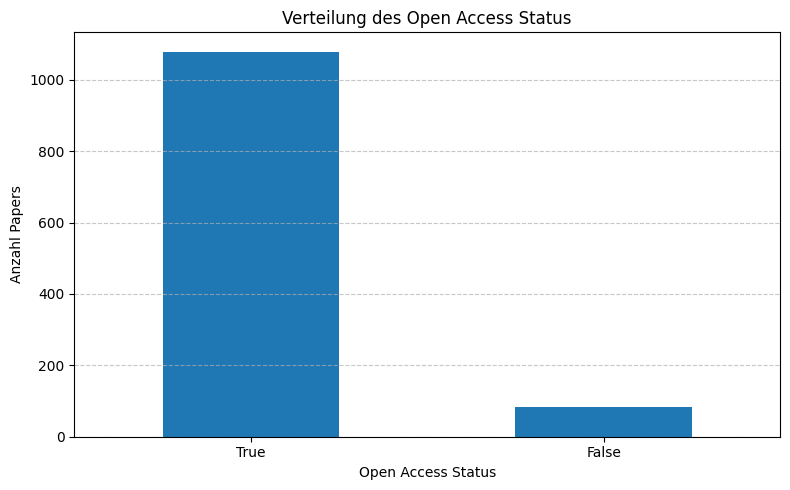

In [17]:
plot_open_access_status(openalex_enriched_data)

In [18]:
openalex_enriched_data['language'].value_counts()

language
en    1162
ca       1
Name: count, dtype: int64